# 一、Logistic回归概述

## 1. Logistic回归的思想

Logistic回归是一种分类的算法，用于分类问题。
  
和很多其他机器学习算法一样，逻辑回归也是从统计学中借鉴来的，尽管名字里有回归俩字儿，但它不是一个需要预测连续结果的回归算法。

与之相反，Logistic 回归是二分类任务的首选方法。它输出一个 0 到 1 之间的离散二值结果。简单来说，它的结果不是 1 就是 0。  

例如癌症检测算法可看做是 Logistic 回归问题的一个简单例子，我们通过Logistic回归算法可以构造出一条决策边界，这种算法输入病理数据并且应该将患有癌症和没有癌症的数据分离开，以此预测患者是患有癌症（1）或没有癌症（0）。

![u=1020746361,3409073954&fm=15&gp=0.jpg](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/Logistic%E5%9B%9E%E5%BD%92.jpg?raw=true)
(当然，Logisitc算法也可以处理多个分类问题，我们先从最简单的二分类问题开始学习)

因此，我们需要完成以下几个步骤：

* 寻找合适的假设函数，即分类函数，用以预测输入数据的判断结果；


* 构造代价函数，即损失函数，用以表示预测的输出结果与训练数据的实际类别之间的偏差；


* 最小化代价函数，从而获取最优的模型参数。

## 二. Logistic回归具体步骤的推导

### 1.构造逻辑函数（sigmoid函数）
   
   logistic回归主要是进行二分类预测，也即是对于0~1之间的概率值，当概率大于0.5预测为1，小于0.5预测为0.Sigmoid函数恰好符合我们的需求，因此选用sigmoid函数。  
   
函数表达式为：
    $$ h(z)=\frac{1}{1+e^{-z}}$$
其图像为：
![c9fcc3cec3fdfc03f23fbf16d73f8794a5c226dc.jpg](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/sigmoid%E5%87%BD%E6%95%B0.jpg?raw=true)

### 2.构造代价函数：
   
   那么，为了区分数据，需要构造一条边界函数将数据分成两块。线性边界可定义为:$$ \theta_0+\theta_1x_1+...+\theta_nx_n=\sum_{i=0}^n\theta_ix_i=\theta^Tx $$
   
   所以 $$ h_\theta(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$
   
   代价函数定义为： $$J(\theta)= \frac{1}{m}\sum_{i=1}^mCost(h_\theta(x^{(i)}),y^{(i)}) $$
   
   $$Cost(h_\theta(x),y)=-ylog(h_\theta(x))-(1-y)log(1-h_\theta(x))$$
   
### 代价函数的具体推导过程：
$h_\theta(x)$函数的值有特殊的含义，它表示结果取1的概率，因此对于输入x分类结果为类别1和类别0的概率分别为：
$$P(y=1|x;\theta)=h_\theta(x)$$
$$P(y=0|x;\theta)=1-h_\theta(x)$$

而$Cost$函数$J(\theta)$是通过最大似然估计推导的。下面详细说明推导过程：

由上式可以综合构造出概率函数：$$P(y|x;\theta)=(h_\theta(x))^y(1-h_\theta(x))^{1-y}$$

取似然函数为：$$L(\theta)=\prod_{i=1}^{m}P(y^{(i)}|x^{(i)};\theta)$$
$$=\prod_{i=1}^{m}(h_\theta(x^{(i)}))^{y^{(i)}}(1-h_\theta(x^{(i)}))^{1-y^{(i)}}$$

对数似然函数为：
$$l(\theta)=logL(\theta)$$
$$=\sum_{i=1}^m(y^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(1-h_\theta(x^{(i)})))$$
最大似然估计就是要使得$l(\theta)$取最大值时的$\theta$，其实这里可以使用梯度上升方法求解，求得$\theta$就是要求的最佳参数，但是，在Andrew Ng的课程中将$J(\theta)$取为：
$$J(\theta)=-\frac{1}{m}l(\theta)$$

因为乘了一个负的系数$-\frac{1}{m}$，所以$J(\theta)$取最小值时的$\theta$为要求的最佳参数

### 3.最小化代价函数：

   最小化代价函数经常使用梯度下降来求$J(\theta)$的最小值：
     
   $$ \theta_j:=\theta_j-\alpha\frac{\partial }{\partial \theta_j}J(\theta) (j=0\dots n)$$ ($\alpha$为学习速率)
   
  求$J(\theta)$的偏导：
  $$\frac{\partial }{\partial \theta_j}J(\theta)=-\frac{1}{m}\sum_{i=1}^m\left (  y^{(i)}\frac{1}{h_\theta(x^{(i)})}\frac{\partial }{\partial \theta_j}h_\theta(x^{(i)})-(1-y^{(i)})\frac{1}{1-h_\theta(x^{(i)})}\frac{\partial }{\partial \theta_j}h_\theta(x^{(i)})\right )$$
  
  $$=-\frac{1}{m}\sum_{i=1}^m\left(y^{(i)}\frac{1}{g(\theta^Tx^{(i)})}-(1-y^{(i)})\frac{1}{1-g(\theta^Tx^{(i)})}\right)\frac{\partial }{\partial \theta_j}g(\theta^Tx^{(i)})$$
  
　　$$=-\frac{1}{m}\sum_{i=1}^m\left(y^{(i)}\frac{1}{g(\theta^Tx^{(i)})}-(1-y^{(i)})\frac{1}{1-g(\theta^Tx^{(i)})}\right)g(\theta^Tx^{(i)})(1-g(\theta^Tx^{(i)}))\frac{\partial }{\partial \theta_j}\theta^Tx^{(i)}$$
  
  $$=-\frac{1}{m}\sum_{i=1}^m\left(y^{(i)}(1-g(\theta^Tx^{(x)}))-(1-y^{(i)})g(\theta^Tx^{(i)})\right)x_j^{(i)}$$
  
  $$=-\frac{1}{m}\sum_{i=1}^m\left(y^i-g(\theta^Tx^{(i)})\right)x_j^{(i)}$$
  
  $$=-\frac{1}{m}\sum_{i=1}^m\left(y^{(i)}-h_\theta(x^{(i)})\right)x_j^{(i)}$$
  
  $$=\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$$
  最后得出梯度下降的更新公式为：
  
  $$\theta_j:=\theta_j-\alpha\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)},  (j=0\dots n)$$
  
  * 优化算法：
  
  因为梯度下降是一种迭代算法，过多的循环语句会使代码的运行时间过长，因此我们可以尽可能的利用向量代替循环语句，让代码的时间复杂度降低。
  
  梯度下降算法的向量化解法：

 　　训练数据的矩阵形式表示如下，其中x的每一行为一条训练样本。

　　$$x=\begin{bmatrix}
x^{(1)}\\ 
x^{(2)}\\ 
\dots\\ 
x^{(m)}
\end{bmatrix}=\begin{bmatrix}
 x_0^{(1)}& x_1^{(1)} & \dots & x_n^{(1)}\\ 
x_0^{(2)} & x_1^{(2)} &  \dots  &x_n^{(2)} \\ 
 \dots  & \dots   & \dots   & \dots  \\ 
x_0^{(m)} &x_1^{(m)}  & \dots & x_n^{(m)}
\end{bmatrix}, y=\begin{bmatrix}
y^{(1)}\\ 
y^{(2)}\\ 
\dots\\ 
y^{(m)}
\end{bmatrix}$$

　　参数$\theta$的矩阵形式为：
$$\theta=\begin{bmatrix}
\theta_0\\ 
\theta_1\\ 
\dots\\ 
\theta_n
\end{bmatrix}$$
　
　　计算$X\cdot \theta$并记为A:

 　$$A=x \cdot\theta=\begin{bmatrix}
 x_0^{(1)}& x_1^{(1)} & \dots & x_n^{(1)}\\ 
x_0^{(2)} & x_1^{(2)} &  \dots  &x_n^{(2)} \\ 
 \dots  & \dots   & \dots   & \dots  \\ 
x_0^{(m)} &x_1^{(m)}  & \dots & x_n^{(m)}
\end{bmatrix}\cdot \begin{bmatrix}
\theta_0\\ 
\theta_1\\ 
\dots\\ 
\theta_n
\end{bmatrix}=\begin{bmatrix}
\theta_0x_0^{(1)}+\theta_1x_1^{(1)}+\dots+\theta_nx_n^{(1)}\\ 
\theta_0x_0^{(2)}+\theta_1x_1^{(2)}+\dots+\theta_nx_n^{(2)}\\ 
\dots\\ 
\theta_0x_0^{(m)}+\theta_1x_1^{(m)}+\dots+\theta_nx_n^{(m)}
\end{bmatrix}$$

　　求$h_\theta(x)-y$并记为E：
$$E=h_\theta(x)-y=\begin{bmatrix}
g(A^{(1)})-y^{(1)}\\ 
g(A^{(2)})-y^{(2)}\\ 
\dots\\ 
g(A^{(m)})-y^{(m)}
\end{bmatrix}=\begin{bmatrix}
e^{(1)}\\ 
e^{(1)}\\ 
\dots\\ 
e^{(1)}
\end{bmatrix}=g(A)-y$$
　　

　　g(A)的参数A为一列向量，所以实现g函数时要支持列向量作为参数，并返回列向量。由上式可知$h_\theta(x)-y$可以由g(A)-y一次计算求得。

　　θ更新过程，当j=0时：
  $$\theta_0:=\theta_0-\alpha\sum_{i=1}^m(h_\theta(x^{(i)})-y^(i))x_0^{(i)}$$
  
  $$=\theta_0-\alpha\sum_{i=1}^me^{(i)}x_0^{(i)}$$
  
  $$=\theta_0-\alpha\cdot(x_0^{(1)},x_0^{(2)},\dots,x_0^{(m)})\cdot E$$

　　θ、j同理：

　$$\theta_j:=\theta_j-\alpha\cdot(x_j^{(1)},x_j^{(2)},\dots,x_j^{(m)})\cdot E$$

　　综合起来：
  $$\begin{bmatrix}
\theta_0\\ 
\theta_1\\ 
\dots\\ 
\theta_n
\end{bmatrix}:=\begin{bmatrix}
\theta_0\\ 
\theta_1\\ 
\dots\\ 
\theta_n
\end{bmatrix}-\alpha\cdot\begin{bmatrix}
 x_0^{(1)}& x_0^{(2)} & \dots & x_0^{(m)}\\ 
x_1^{(1)} & x_1^{(2)} &  \dots  &x_1^{(m)} \\ 
 \dots  & \dots   & \dots   & \dots  \\ 
x_n^{(1)} &x_n^{(2)}  & \dots & x_n^{(m)}
\end{bmatrix}\cdot E$$

$$=\theta-\alpha\cdot X^T\cdot E$$
 
　　综上所述，向量化后θ更新的步骤如下：

　　（1）求$A=X\cdot \theta$；

　　（2）求$E=g(A)-y$；

　　（3）求$\theta:=\theta-\alpha \cdot X^T\cdot E$

　　也可以综合起来写成：　$$\theta :=\theta-\alpha \cdot (\frac{1}{m})\cdot X^T\cdot (g(X\cdot \theta)-y) $$
  

  
  这样就把复杂的梯度算法简化成了一行代码。
  ## 三、Python实现Logistic回归实例
  
  Python代码：

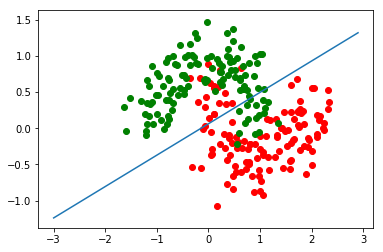

In [3]:
from numpy import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons 
#构造数据测试集
Input_data, y = make_moons(250, noise=0.25) 
dataMat=mat(Input_data) #把输入数组转换成矩阵（之后的*就由元素对应相乘转换成了矩阵的乘法）,维度（m,n）
                        
dataLebel = mat(y).transpose() #把标签转换成矩阵,维度（m,1）
                               
dataMat=[]
n=shape(Input_data)[0]

#将x0=1,添加进输入数组中
for i in range(n):
    dataMat.append([1,Input_data[i][0],Input_data[i][1]])
    
#构造sigmoid 函数
def sigmoid (x):
    return 1/(1+exp(-x))

#构造梯度下降函数
def gradAscent(dataMat,dataLebel):
    dataMatrix=mat(dataMat)#转换成矩阵
    labelMat=mat(dataLebel)
    m,n=shape(dataMatrix) #获取输入矩阵维度（m,n）
    weights=ones((n,1)) #初始化权重矩阵，维度(n,1)
    alpha=0.001 #定义学习速率
    maxCycles=500 #学习循环次数
    for i in range(maxCycles):
        h=sigmoid(dataMatrix * weights) #sigmoid 函数
        error=labelMat - h #即y-h，（m,1）
        weights=weights + alpha * dataMatrix.transpose() * error #梯度上升法
    return weights

#绘制边界曲线，因为数据集有3个参数：x1,x2,y。所以将x1为横坐标，将x2为纵坐标，y=1为红色，y=0为绿色
def plotBestFit(weights):
    n=shape(dataMat)[0] 
    xcord1=[];ycord1=[] #把x2当成y来绘制平面图
    xcord2=[];ycord2=[]
    for i in range(n):
        if dataLebel[i]==1: 
            xcord1.append(dataMat[i][1])
            ycord1.append(dataMat[i][2])
        else:              
            xcord2.append(dataMat[i][1])
            ycord2.append(dataMat[i][2])
    plt.scatter(xcord1,ycord1,c='red') #如果y=1 ，则绘制成红色
    plt.scatter(xcord2,ycord2,c='green')#如果y=0，则绘制成绿色
    x=arange(-3,3,0.1)
    y=(-weights[0,0]-weights[1,0]*x)/weights[2,0] #因为0 = w0+w1*x1+w2*x2,把x2当成y ，得：y = (-w0-w1*x1)/w2
    plt.plot(x,y)
    plt.show()
    
#正式运行测试：
weights = gradAscent(dataMat,dataLebel)
plotBestFit(weights)

# 四、 神经网络和深度学习 - 具有神经网络思维的Logistic回归

我们要做的事是搭建一个能够【识别猫】 的简单的神经网络

在开始之前，我们有需要引入的库：

* numpy ：是用Python进行科学计算的基本软件包。

* h5py：是与H5文件中存储的数据集进行交互的常用软件包。

* matplotlib：是一个著名的库，用于在Python中绘制图表。

* lr_utils ：在本地的资料包里，一个加载资料包里面的数据的简单功能的库（将文件解压到代码文件同一级目录下,请确保代码目录有lr_utils.py和datasets文件夹。）。

如果你没有以上的库，请自行安装。


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

lr_utils.py代码如下，你也可以自行打开它查看：

In [3]:
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

解释以下上面的load_dataset() 返回的值的含义：

* train_set_x_orig ：保存的是训练集里面的图像数据（本训练集有209张64x64的图像）。
* train_set_y_orig ：保存的是训练集的图像对应的分类值（【0 | 1】，0表示不是猫，1表示是猫）。
* test_set_x_orig ：保存的是测试集里面的图像数据（本训练集有50张64x64的图像）。
* test_set_y_orig ： 保存的是测试集的图像对应的分类值（【0 | 1】，0表示不是猫，1表示是猫）。
* classes ： 保存的是以bytes类型保存的两个字符串数据，数据为：[b’non-cat’ b’cat’]。

现在我们就要把这些数据加载到主程序里面：

In [4]:
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = load_dataset()

我们可以看一下我们加载的文件里面的图片都是些什么样子的，比如我就查看一下训练集里面的第26张图片，当然你也可以改变index的值查看一下其他的图片。

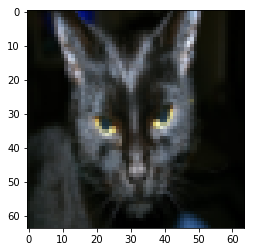

In [16]:
index = 25
plt.imshow(train_set_x_orig[index])
plt.show()
#print("train_set_y=" + str(train_set_y)) #你也可以看一下训练集里面的标签是什么样的。

现在我们可以结合一下训练集里面的数据来看一下我到底都加载了一些什么东西。

In [10]:
#打印出当前的训练标签值
#使用np.squeeze的目的是压缩维度，【未压缩】train_set_y[:,index]的值为[1] , 【压缩后】np.squeeze(train_set_y[:,index])的值为1
#print("【使用np.squeeze：" + str(np.squeeze(train_set_y[:,index])) + "，不使用np.squeeze： " + str(train_set_y[:,index]) + "】")
#只有压缩后的值才能进行解码操作
print("y=" + str(train_set_y[:,index]) + ", it's a " + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") + "' picture")

y=[1], it's a cat' picture


打印出的结果是：y=[1], it's a cat' picture，我们进行下一步，我们查看一下我们加载的图像数据集具体情况，我对以下参数做出解释：

* m_train ：训练集里图片的数量。
* m_test ：测试集里图片的数量。
* num_px ： 训练、测试集里面的图片的宽度和高度（均为64x64）。

请记住，train_set_x_orig 是一个维度为(m_​​train，num_px，num_px，3）的数组。

In [30]:
m_train = train_set_y.shape[1] #训练集里图片的数量。
m_test = test_set_y.shape[1] #测试集里图片的数量。
num_px = train_set_x_orig.shape[1] #训练、测试集里面的图片的宽度和高度（均为64x64）。

#现在看一看我们加载的东西的具体情况
print ("训练集的数量: m_train = " + str(m_train))
print ("测试集的数量 : m_test = " + str(m_test))
print ("每张图片的宽/高 : num_px = " + str(num_px))
print ("每张图片的大小 : (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("训练集_图片的维数 : " + str(train_set_x_orig.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集_图片的维数: " + str(test_set_x_orig.shape))
print ("测试集_标签的维数: " + str(test_set_y.shape))

训练集的数量: m_train = 209
测试集的数量 : m_test = 50
每张图片的宽/高 : num_px = 64
每张图片的大小 : (64, 64, 3)
训练集_图片的维数 : (209, 64, 64, 3)
训练集_标签的维数 : (1, 209)
测试集_图片的维数: (50, 64, 64, 3)
测试集_标签的维数: (1, 50)


为了方便，我们要把维度为（64，64，3）的numpy数组重新构造为（64 x 64 x 3，1）的数组，要乘以3的原因是每张图片是由64x64像素构成的，而每个像素点由（R，G，B）三原色构成的，所以要乘以3。在此之后，我们的训练和测试数据集是一个numpy数组，【每列代表一个平坦的图像】 ，应该有m_train和m_test列。

当你想将形状（a，b，c，d）的矩阵X平铺成形状（b * c * d，a）的矩阵X_flatten时，可以使用以下代码：

In [31]:
#X_flatten = X.reshape(X.shape [0]，-1).T ＃X.T是X的转置
#将训练集的维度降低并转置。
train_set_x_flatten  = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
#将测试集的维度降低并转置。
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

这一段意思是指把数组变为209行的矩阵（因为训练集里有209张图片），但是我懒得算列有多少，于是我就用-1告诉程序你帮我算，最后程序算出来时12288列，我再最后用一个T表示转置，这就变成了12288行，209列。测试集亦如此。

然后我们看看降维之后的情况是怎么样的：

In [32]:
print ("训练集降维最后的维度： " + str(train_set_x_flatten.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集降维之后的维度: " + str(test_set_x_flatten.shape))
print ("测试集_标签的维数 : " + str(test_set_y.shape))

训练集降维最后的维度： (12288, 209)
训练集_标签的维数 : (1, 209)
测试集降维之后的维度: (12288, 50)
测试集_标签的维数 : (1, 50)


为了表示彩色图像，必须为每个像素指定红色，绿色和蓝色通道（RGB），因此像素值实际上是从0到255范围内的三个数字的向量。机器学习中一个常见的预处理步骤是对数据集进行居中和标准化，这意味着可以减去每个示例中整个numpy数组的平均值，然后将每个示例除以整个numpy数组的标准偏差。但对于图片数据集，它更简单，更方便，几乎可以将数据集的每一行除以255（像素通道的最大值），因为在RGB中不存在比255大的数据，所以我们可以放心的除以255，让标准化的数据位于[0,1]之间，现在标准化我们的数据集：

In [33]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

![20180321155834774.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/%E8%AF%86%E5%88%AB%E7%8C%AB%E7%9A%84%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.png?raw=true)

现在总算是把我们加载的数据弄完了，我们现在开始构建神经网络。

以下是数学表达式，如果对数学公式不甚理解，请仔细看一下吴恩达的视频。

对于$x^{(i)}$:$$z^{(i)}=w^Tx^{(i)}+b$$ $$\hat{y}^{(i)}=a^{(i)}=sigmoid(z^{(i)})$$ 
$$L(a^{(i)},y^{(i)})=-y^{(i)}log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

然后通过对所有训练样例求和来计算成本:$$J=\frac{1}{m}\sum_{i}^m L(a^{(i)},y^{(i)})$$

建立神经网络的主要步骤是： 
1. 定义模型结构（例如输入特征的数量） 
2. 初始化模型的参数 
3. 循环：

 * 3.1 计算当前损失（正向传播）

 * 3.2 计算当前梯度（反向传播）

 * 3.3 更新参数（梯度下降）
 
 现在构建sigmoid()，需要使用 sigmoid（$w^TX+b$） 计算来做出预测。

In [34]:
def sigmoid(z):
    """
    参数：
        z  - 任何大小的标量或numpy数组。
 
    返回：
        s  -  sigmoid（z）
  """
    s = 1 / (1 + np.exp(-z))
    return s

我们可以测试一下sigmoid()，检查一下是否符合我们所需要的条件。

In [35]:
#测试sigmoid()
print("====================测试sigmoid====================")
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

====================测试sigmoid====================
sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


既然sigmoid测试好了，我们现在就可以初始化我们需要的参数w和b了。

In [37]:
def initialize_with_zeros(dim):
    """
        此函数为w创建一个维度为（dim，1）的0向量，并将b初始化为0。

        参数：
            dim  - 我们想要的w矢量的大小（或者这种情况下的参数数量）

        返回：
            w  - 维度为（dim，1）的初始化向量。
            b  - 初始化的标量（对应于偏差）
    """
    w = np.zeros(shape = (dim,1))
    b = 0
    #使用断言来确保我要的数据是正确的
    assert(w.shape == (dim, 1)) #w的维度是(dim,1)
    assert(isinstance(b, float) or isinstance(b, int)) #b的类型是float或者是int

    return (w , b)

初始化参数的函数已经构建好了，现在就可以执行“前向”和“后向”传播步骤来学习参数。

我们现在要实现一个计算成本函数及其渐变的函数propagate（）。

In [38]:
def propagate(w, b, X, Y):
    """
    实现前向和后向传播的成本函数及其梯度。
    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 矩阵类型为（num_px * num_px * 3，训练数量）
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据数量)

    返回：
        cost- 逻辑回归的负对数似然成本
        dw  - 相对于w的损失梯度，因此与w相同的形状
        db  - 相对于b的损失梯度，因此与b的形状相同
    """
    m = X.shape[1]

    #正向传播
    A = sigmoid(np.dot(w.T,X) + b) #计算激活值，请参考公式2。
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) #计算成本，请参考公式3和4。

    #反向传播
    dw = (1 / m) * np.dot(X, (A - Y).T) #请参考视频中的偏导公式。
    db = (1 / m) * np.sum(A - Y) #请参考视频中的偏导公式。

    #使用断言确保我的数据是正确的
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    #创建一个字典，把dw和db保存起来。
    grads = {
                "dw": dw,
                "db": db
             }
    return (grads , cost)

写好之后我们来测试一下。

In [39]:
#测试一下propagate
print("====================测试propagate====================")
#初始化一些参数
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

====================测试propagate====================
dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


现在，我要使用渐变下降更新参数。

目标是通过最小化成本函数 $J$ 来学习 $w$和$b$ 。对于参数 $\theta$ ，更新规则是$\theta=\theta-\alpha d\theta$，其中 $\alpha$是学习率。

In [1]:
def propagate(w, b, X, Y):
    """
    实现前向和后向传播的成本函数及其梯度。
    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 矩阵类型为（num_px * num_px * 3，训练数量）
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据数量)

    返回：
        cost- 逻辑回归的负对数似然成本
        dw  - 相对于w的损失梯度，因此与w相同的形状
        db  - 相对于b的损失梯度，因此与b的形状相同
    """
    m = X.shape[1]

    #正向传播
    A = sigmoid(np.dot(w.T,X) + b) #计算激活值，请参考公式2。
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) #计算成本，请参考公式3和4。

    #反向传播
    dw = (1 / m) * np.dot(X, (A - Y).T) #请参考视频中的偏导公式。
    db = (1 / m) * np.sum(A - Y) #请参考视频中的偏导公式。

    #使用断言确保我的数据是正确的
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    #创建一个字典，把dw和db保存起来。
    grads = {
                "dw": dw,
                "db": db
             }
    return (grads , cost)

现在就让我们来测试一下优化函数：

In [16]:
#测试一下propagate
print("====================测试propagate====================")
#初始化一些参数
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

====================测试propagate====================
dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


optimize函数会输出已学习的w和b的值，我们可以使用w和b来预测数据集X的标签。

现在我们要实现预测函数predict（）。计算预测有两个步骤：

1.计算 $\hat{Y}=A=\sigma(w^TX+b)$

2.将a的值变为0（如果激活值<= 0.5）或者为1（如果激活值> 0.5），

然后将预测值存储在向量Y_prediction中。

In [17]:
def predict(w , b , X ):
    """
    使用学习逻辑回归参数logistic （w，b）预测标签是0还是1，

    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数据

    返回：
        Y_prediction  - 包含X中所有图片的所有预测【0 | 1】的一个numpy数组（向量）

    """

    m  = X.shape[1] #图片的数量
    Y_prediction = np.zeros((1,m)) 
    w = w.reshape(X.shape[0],1)

    #计预测猫在图片中出现的概率
    A = sigmoid(np.dot(w.T , X) + b)
    for i in range(A.shape[1]):
        #将概率a [0，i]转换为实际预测p [0，i]
        Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0
    #使用断言
    assert(Y_prediction.shape == (1,m))

    return Y_prediction

老规矩，测试一下。

In [18]:
#测试predict
print("====================测试predict====================")
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
print("predictions = " + str(predict(w, b, X)))

====================测试predict====================
predictions = [[1. 1.]]


就目前而言，我们基本上把所有的东西都做完了，现在我们要把这些函数统统整合到一个model()函数中，届时只需要调用一个model()就基本上完成所有的事了。

In [19]:
def model(X_train , Y_train , X_test , Y_test , num_iterations = 2000 , learning_rate = 0.5 , print_cost = False):
    """
    通过调用之前实现的函数来构建逻辑回归模型

    参数：
        X_train  - numpy的数组,维度为（num_px * num_px * 3，m_train）的训练集
        Y_train  - numpy的数组,维度为（1，m_train）（矢量）的训练标签集
        X_test   - numpy的数组,维度为（num_px * num_px * 3，m_test）的测试集
        Y_test   - numpy的数组,维度为（1，m_test）的（向量）的测试标签集
        num_iterations  - 表示用于优化参数的迭代次数的超参数
        learning_rate  - 表示optimize（）更新规则中使用的学习速率的超参数
        print_cost  - 设置为true以每100次迭代打印成本

    返回：
        d  - 包含有关模型信息的字典。
    """
    w , b = initialize_with_zeros(X_train.shape[0])

    parameters , grads , costs = optimize(w , b , X_train , Y_train,num_iterations , learning_rate , print_cost)

    #从字典“参数”中检索参数w和b
    w , b = parameters["w"] , parameters["b"]

    #预测测试/训练集的例子
    Y_prediction_test = predict(w , b, X_test)
    Y_prediction_train = predict(w , b, X_train)

    #打印训练后的准确性
    print("训练集准确性："  , format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100) ,"%")
    print("测试集准确性："  , format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100) ,"%")

    d = {
            "costs" : costs,
            "Y_prediction_test" : Y_prediction_test,
            "Y_prediciton_train" : Y_prediction_train,
            "w" : w,
            "b" : b,
            "learning_rate" : learning_rate,
            "num_iterations" : num_iterations }
    return d

把整个model构建好之后我们这就算是正式的实际测试了，我们这就来实际跑一下。

In [20]:
print("====================测试model====================")     
#这里加载的是真实的数据，请参见上面的代码部分。
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

====================测试model====================
迭代的次数: 0 ， 误差值： 0.693147
迭代的次数: 100 ， 误差值： 0.584508
迭代的次数: 200 ， 误差值： 0.466949
迭代的次数: 300 ， 误差值： 0.376007
迭代的次数: 400 ， 误差值： 0.331463
迭代的次数: 500 ， 误差值： 0.303273
迭代的次数: 600 ， 误差值： 0.279880
迭代的次数: 700 ， 误差值： 0.260042
迭代的次数: 800 ， 误差值： 0.242941
迭代的次数: 900 ， 误差值： 0.228004
迭代的次数: 1000 ， 误差值： 0.214820
迭代的次数: 1100 ， 误差值： 0.203078
迭代的次数: 1200 ， 误差值： 0.192544
迭代的次数: 1300 ， 误差值： 0.183033
迭代的次数: 1400 ， 误差值： 0.174399
迭代的次数: 1500 ， 误差值： 0.166521
迭代的次数: 1600 ， 误差值： 0.159305
迭代的次数: 1700 ， 误差值： 0.152667
迭代的次数: 1800 ， 误差值： 0.146542
迭代的次数: 1900 ， 误差值： 0.140872
训练集准确性： 99.04306220095694 %
测试集准确性： 70.0 %


我们更改一下学习率和迭代次数，有可能会发现训练集的准确性可能会提高，但是测试集准确性会下降，这是由于过拟合造成的，但是我们并不需要担心，我们以后会使用更好的算法来解决这些问题的。

到目前为止，我们的程序算是完成了，但是，我们可以在后面加一点东西，比如画点图什么的。

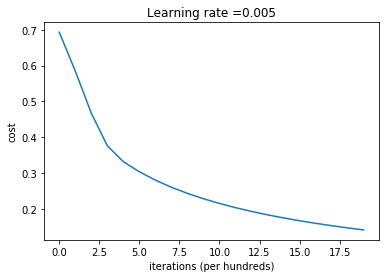

In [21]:
#绘制图
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

跑一波出来的效果图是这样的，可以看到成本下降，它显示参数正在被学习

让我们进一步分析一下，并研究学习率alpha的可能选择。为了让渐变下降起作用，我们必须明智地选择学习速率。学习率αα 决定了我们更新参数的速度。如果学习率过高，我们可能会“超过”最优值。同样，如果它太小，我们将需要太多迭代才能收敛到最佳值。这就是为什么使用良好调整的学习率至关重要的原因。

我们可以比较一下我们模型的学习曲线和几种学习速率的选择。也可以尝试使用不同于我们初始化的learning_rates变量包含的三个值，并看一下会发生什么。

learning rate is: 0.01
训练集准确性： 99.52153110047847 %
测试集准确性： 68.0 %

-------------------------------------------------------

learning rate is: 0.001
训练集准确性： 88.99521531100478 %
测试集准确性： 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
训练集准确性： 68.42105263157895 %
测试集准确性： 36.0 %

-------------------------------------------------------



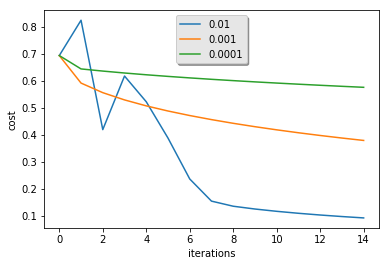

In [48]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

[完整代码]：

训练集的数量: m_train = 209
测试集的数量 : m_test = 50
每张图片的宽/高 : num_px = 64
每张图片的大小 : (64, 64, 3)
训练集_图片的维数 : (209, 64, 64, 3)
训练集_标签的维数 : (1, 209)
测试集_图片的维数: (50, 64, 64, 3)
测试集_标签的维数: (1, 50)
训练集降维最后的维度： (12288, 209)
训练集_标签的维数 : (1, 209)
测试集降维之后的维度: (12288, 50)
测试集_标签的维数 : (1, 50)
迭代的次数: 0 ， 误差值： 0.693147
迭代的次数: 100 ， 误差值： 0.584508
迭代的次数: 200 ， 误差值： 0.466949
迭代的次数: 300 ， 误差值： 0.376007
迭代的次数: 400 ， 误差值： 0.331463
迭代的次数: 500 ， 误差值： 0.303273
迭代的次数: 600 ， 误差值： 0.279880
迭代的次数: 700 ， 误差值： 0.260042
迭代的次数: 800 ， 误差值： 0.242941
迭代的次数: 900 ， 误差值： 0.228004
迭代的次数: 1000 ， 误差值： 0.214820
迭代的次数: 1100 ， 误差值： 0.203078
迭代的次数: 1200 ， 误差值： 0.192544
迭代的次数: 1300 ， 误差值： 0.183033
迭代的次数: 1400 ， 误差值： 0.174399
迭代的次数: 1500 ， 误差值： 0.166521
迭代的次数: 1600 ， 误差值： 0.159305
迭代的次数: 1700 ， 误差值： 0.152667
迭代的次数: 1800 ， 误差值： 0.146542
迭代的次数: 1900 ， 误差值： 0.140872
训练集准确性： 99.04306220095694 %
测试集准确性： 70.0 %


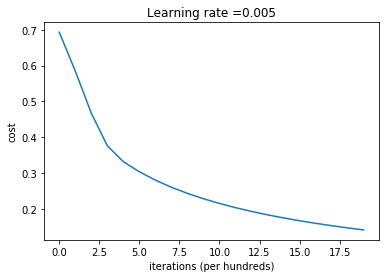

In [49]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 21 17:25:30 2018

博客地址 ：http://blog.csdn.net/u013733326/article/details/79639509

@author: Oscar
"""

import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = load_dataset()

m_train = train_set_y.shape[1] #训练集里图片的数量。
m_test = test_set_y.shape[1] #测试集里图片的数量。
num_px = train_set_x_orig.shape[1] #训练、测试集里面的图片的宽度和高度（均为64x64）。

#现在看一看我们加载的东西的具体情况
print ("训练集的数量: m_train = " + str(m_train))
print ("测试集的数量 : m_test = " + str(m_test))
print ("每张图片的宽/高 : num_px = " + str(num_px))
print ("每张图片的大小 : (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("训练集_图片的维数 : " + str(train_set_x_orig.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集_图片的维数: " + str(test_set_x_orig.shape))
print ("测试集_标签的维数: " + str(test_set_y.shape))

#将训练集的维度降低并转置。
train_set_x_flatten  = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
#将测试集的维度降低并转置。
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("训练集降维最后的维度： " + str(train_set_x_flatten.shape))
print ("训练集_标签的维数 : " + str(train_set_y.shape))
print ("测试集降维之后的维度: " + str(test_set_x_flatten.shape))
print ("测试集_标签的维数 : " + str(test_set_y.shape))

train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

def sigmoid(z):
    """
    参数：
        z  - 任何大小的标量或numpy数组。

    返回：
        s  -  sigmoid（z）
    """
    s = 1 / (1 + np.exp(-z))
    return s

def initialize_with_zeros(dim):
    """
        此函数为w创建一个维度为（dim，1）的0向量，并将b初始化为0。

        参数：
            dim  - 我们想要的w矢量的大小（或者这种情况下的参数数量）

        返回：
            w  - 维度为（dim，1）的初始化向量。
            b  - 初始化的标量（对应于偏差）
    """
    w = np.zeros(shape = (dim,1))
    b = 0
    #使用断言来确保我要的数据是正确的
    assert(w.shape == (dim, 1)) #w的维度是(dim,1)
    assert(isinstance(b, float) or isinstance(b, int)) #b的类型是float或者是int

    return (w , b)

def propagate(w, b, X, Y):
    """
    实现前向和后向传播的成本函数及其梯度。
    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 矩阵类型为（num_px * num_px * 3，训练数量）
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据数量)

    返回：
        cost- 逻辑回归的负对数似然成本
        dw  - 相对于w的损失梯度，因此与w相同的形状
        db  - 相对于b的损失梯度，因此与b的形状相同
    """
    m = X.shape[1]

    #正向传播
    A = sigmoid(np.dot(w.T,X) + b) #计算激活值，请参考公式2。
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) #计算成本，请参考公式3和4。

    #反向传播
    dw = (1 / m) * np.dot(X, (A - Y).T) #请参考视频中的偏导公式。
    db = (1 / m) * np.sum(A - Y) #请参考视频中的偏导公式。

    #使用断言确保我的数据是正确的
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    #创建一个字典，把dw和db保存起来。
    grads = {
                "dw": dw,
                "db": db
             }
    return (grads , cost)

def optimize(w , b , X , Y , num_iterations , learning_rate , print_cost = False):
    """
    此函数通过运行梯度下降算法来优化w和b

    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数组。
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        num_iterations  - 优化循环的迭代次数
        learning_rate  - 梯度下降更新规则的学习率
        print_cost  - 每100步打印一次损失值

    返回：
        params  - 包含权重w和偏差b的字典
        grads  - 包含权重和偏差相对于成本函数的梯度的字典
        成本 - 优化期间计算的所有成本列表，将用于绘制学习曲线。

    提示：
    我们需要写下两个步骤并遍历它们：
        1）计算当前参数的成本和梯度，使用propagate（）。
        2）使用w和b的梯度下降法则更新参数。
    """

    costs = []

    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        #记录成本
        if i % 100 == 0:
            costs.append(cost)
        #打印成本数据
        if (print_cost) and (i % 100 == 0):
            print("迭代的次数: %i ， 误差值： %f" % (i,cost))

    params  = {
                "w" : w,
                "b" : b }
    grads = {
            "dw": dw,
            "db": db } 
    return (params , grads , costs)

def predict(w , b , X ):
    """
    使用学习逻辑回归参数logistic （w，b）预测标签是0还是1，

    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数据

    返回：
        Y_prediction  - 包含X中所有图片的所有预测【0 | 1】的一个numpy数组（向量）

    """

    m  = X.shape[1] #图片的数量
    Y_prediction = np.zeros((1,m)) 
    w = w.reshape(X.shape[0],1)

    #计预测猫在图片中出现的概率
    A = sigmoid(np.dot(w.T , X) + b)
    for i in range(A.shape[1]):
        #将概率a [0，i]转换为实际预测p [0，i]
        Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0
    #使用断言
    assert(Y_prediction.shape == (1,m))

    return Y_prediction

def model(X_train , Y_train , X_test , Y_test , num_iterations = 2000 , learning_rate = 0.5 , print_cost = False):
    """
    通过调用之前实现的函数来构建逻辑回归模型

    参数：
        X_train  - numpy的数组,维度为（num_px * num_px * 3，m_train）的训练集
        Y_train  - numpy的数组,维度为（1，m_train）（矢量）的训练标签集
        X_test   - numpy的数组,维度为（num_px * num_px * 3，m_test）的测试集
        Y_test   - numpy的数组,维度为（1，m_test）的（向量）的测试标签集
        num_iterations  - 表示用于优化参数的迭代次数的超参数
        learning_rate  - 表示optimize（）更新规则中使用的学习速率的超参数
        print_cost  - 设置为true以每100次迭代打印成本

    返回：
        d  - 包含有关模型信息的字典。
    """
    w , b = initialize_with_zeros(X_train.shape[0])

    parameters , grads , costs = optimize(w , b , X_train , Y_train,num_iterations , learning_rate , print_cost)

    #从字典“参数”中检索参数w和b
    w , b = parameters["w"] , parameters["b"]

    #预测测试/训练集的例子
    Y_prediction_test = predict(w , b, X_test)
    Y_prediction_train = predict(w , b, X_train)

    #打印训练后的准确性
    print("训练集准确性："  , format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100) ,"%")
    print("测试集准确性："  , format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100) ,"%")

    d = {
            "costs" : costs,
            "Y_prediction_test" : Y_prediction_test,
            "Y_prediciton_train" : Y_prediction_train,
            "w" : w,
            "b" : b,
            "learning_rate" : learning_rate,
            "num_iterations" : num_iterations }
    return d

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

#绘制图
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()